In [1]:
# Movie Review Analysis

In [2]:
import os
os.chdir('D:\Python')

In [3]:
import pandas as pd
import matplotlib as plt

In [4]:
#import data and plotting packages
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
#import machine learning package
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# download corpus from NLTK
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Load data
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle
random.shuffle(documents)

# Convert to DataFrame
texts = [" ".join(words) for words, label in documents]
labels = [1 if label == "pos" else 0 for words, label in documents]  # 1 = positive, 0 = negative

df = pd.DataFrame({'review': texts, 'sentiment': labels})
df.head()

,review,sentiment
0,wizards is an animated feature that begins wit...,0
1,"not since 1996 ' s shine , which starred geoff...",1
2,"at first glance , it appears that the home alo...",1
3,"in this good natured , pleasent and easy going...",1
4,"synopsis : a maniac , crazed by virulent micro...",0


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=123)

# Vectorize the text (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Use Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [10]:
# Use Logistic Regression
# model = LogisticRegression(max_iter=1000,class_weight='balanced')
# model.fit(X_train_vec, y_train)

Accuracy: 0.802

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       260
           1       0.79      0.80      0.80       240

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



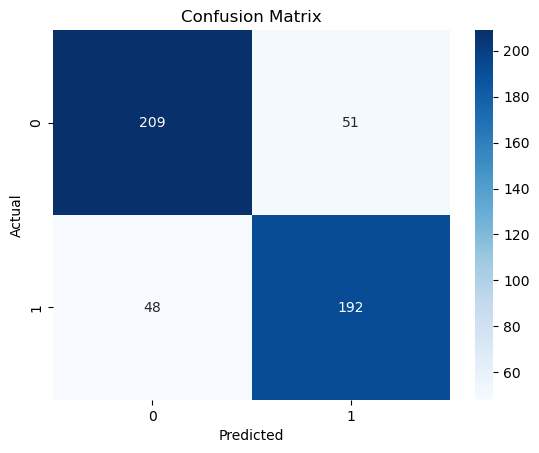

In [11]:
# Predict
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Test your own review
def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Positive" if prediction == 1 else "Negative"

In [13]:
# Example
predict_sentiment("This movie was amazing and full of surprises but the first half was a little dull and climax was not that enthralling")

'Negative'

In [14]:
# Example
predict_sentiment("This movie is the best movie I have even seen")

'Positive'